# Rain
麻煩點 
1:缺失值處理
2:object轉換

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

columns欄位介紹  
Date:The date of observation  
Location:The common name of the location of the weather station   
MinTemp:The minimum temperature in degrees celsius  
MaxTemp:The maximum temperature in degrees celsius  
Rainfall:The amount of rainfall recorded for the day in mm  
Evaporation(蒸發):The so-called Class A pan evaporation (mm) in the 24 hours to 9am  
Sunshine:The number of hours of bright sunshine in the day.  
WindGustDir:The direction of the strongest wind gust in the 24 hours to midnight  
WindGustSpeed:The speed (km/h) of the strongest wind gust in the 24 hours to midnight  
WindDir9am:Direction of the wind at 9am  
WindDir3pm:Direction of the wind at 3pm  
WindSpeed9am:Wind speed (km/hr) averaged over 10 minutes prior to 9am  
WindSpeed3pm:Wind speed (km/hr) averaged over 10 minutes prior to 3pm  
Humidity9am:Humidity (percent) at 9am  
Humidity3pm:Humidity (percent) at 3pm  
Pressure9am:Atmospheric pressure (hpa) reduced to mean sea level at 9am  
Pressure3pm:Atmospheric pressure (hpa) reduced to mean sea level at 3pm  
Cloud9am:Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.  
Cloud3pm:Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values  
Temp9am:Temperature (degrees C) at 9am  
Temp3pm:Temperature (degrees C) at 3pm  
RainToday:Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0  
RainTomorrow:The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".  

## 查看資料Dtype

In [2]:
path="weatherAUS.csv"
data=pd.read_csv(path)
print("data_shape=",data.shape)
print("data_columns=",data.columns)
data.info()

data_shape= (145460, 23)
data_columns= Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-nul

## 查看缺失值

In [3]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

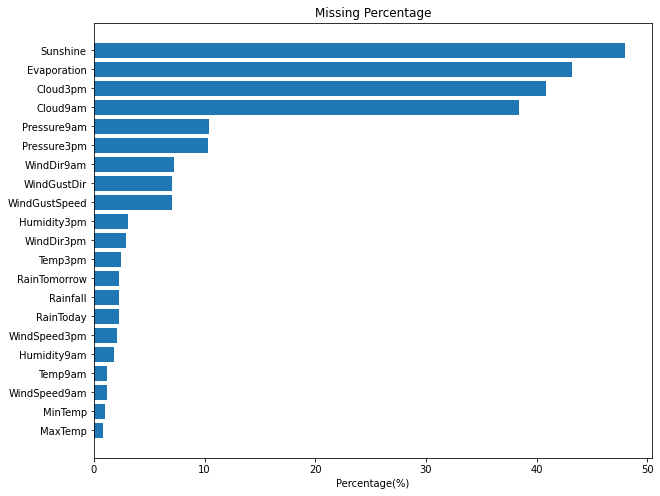

In [4]:
def Missing_Counts( Data ) : 
    missing = Data.isnull().sum()  # 計算欄位中缺漏值的數量 
    missing = missing[ missing>0 ]
    missing.sort_values( inplace=True,ascending=False) 
    Missing_Count = pd.DataFrame( { 'ColumnName':missing.index, 'MissingCount':missing.values } )  # Convert Series to DataFrame
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['MissingCount'].apply( lambda x:round(x/Data.shape[0]*100,2) )
    return  Missing_Count
#missing= Missing_Counts(dataset).sort_values('Percentage(%)',inplace=True,ascending=False) 
missing= Missing_Counts(data)
#print(missing)
plt.figure(figsize=(10,8))
try:
    plt.title('Missing Percentage')
except:
    pass
plt.xlabel('Percentage(%)')
plt.barh(missing['ColumnName'],width=missing['Percentage(%)'])
#反轉y軸
plt.gca().invert_yaxis()
plt.show()

In [5]:
data['Location'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [6]:
data['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

## 資料視覺化

In [7]:
import pandas as pd
from pandas_profiling import ProfileReport
report = ProfileReport(data, title="Rain Dataset")
report.to_file("Rain_Dataset_Pandas_Profiling.html")

c:\Users\User\anaconda3\envs\pytorch_gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\User\AppData\Local\Temp\ipykernel_50300\270481021.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 56.81it/s]
